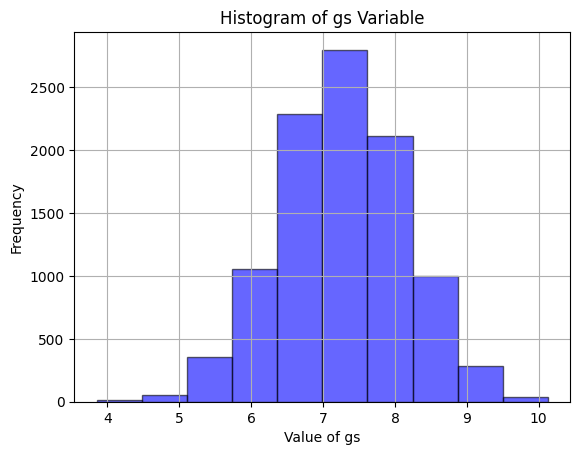

In [15]:
#question 1a

import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(1234)

# Define parameters for the normal distribution, same as sample
mean_gs = 7.25
std_dev_gs = 0.875
num_samples = 10000

# Generate the gs variable
gs = np.random.normal(mean_gs, std_dev_gs, num_samples)

# Create a histogram plot of gs
plt.hist(gs, bins=10, density=False, alpha=0.6, color='b', edgecolor='black')
plt.title('Histogram of gs Variable')
plt.xlabel('Value of gs')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


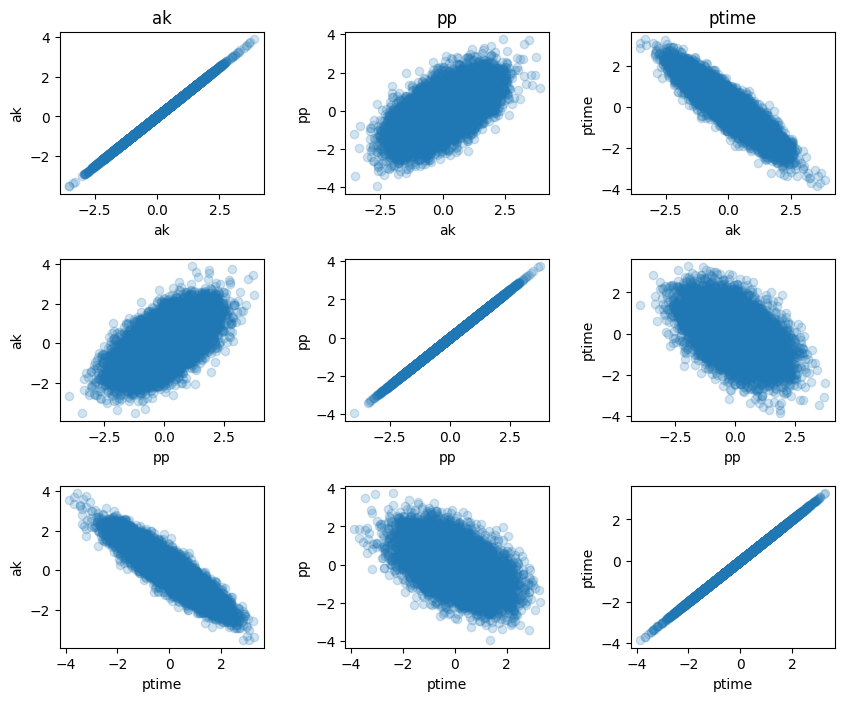

In [16]:
#question 1b

import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(1234)

# Define the means and covariance matrix for the multivariate normal distribution
means = [0, 0, 0]
cov_matrix = [[1, 0.6, -0.9], [0.6, 1, -0.5], [-0.9, -0.5, 1]]

# Generate 10,000 samples from the multivariate normal distribution
APT = np.random.multivariate_normal(means, cov_matrix, 10000)

# Plot
labels = ['ak', 'pp', 'ptime']
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i in range(3):
    for j in range(3):
        plt.subplot(3, 3, i*3 + j + 1)
        plt.scatter(APT[:, i], APT[:, j], alpha=0.2)
        plt.xlabel(labels[i])
        plt.ylabel(labels[j])
        if i == 0:
            plt.title(labels[j])

plt.show()



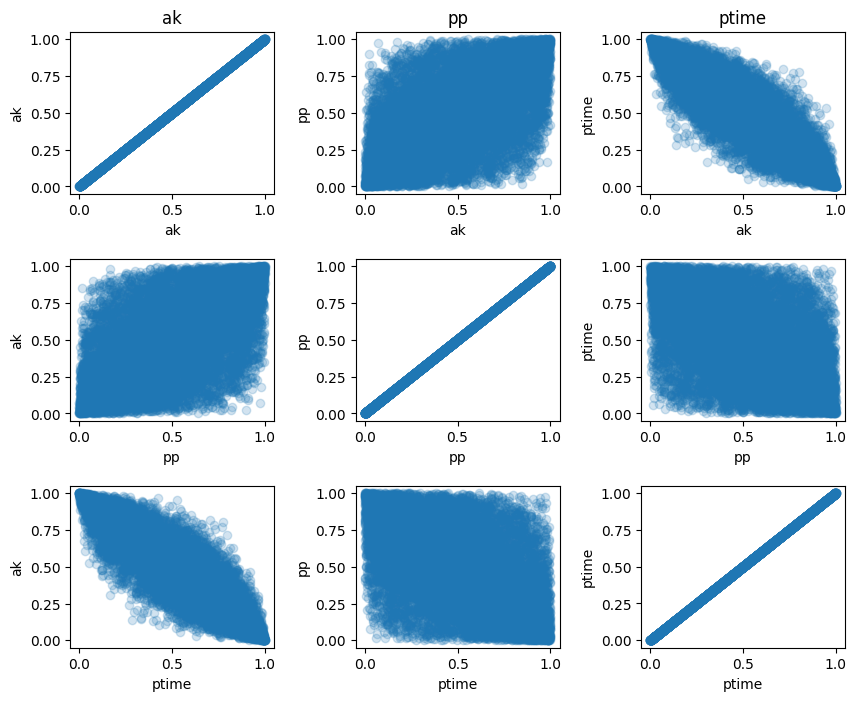

In [17]:
#question 1c

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set the seed for reproducibility
np.random.seed(1234)

# Assuming APT contains the generated variables (ak, pp, ptime)

labels = ['ak', 'pp', 'ptime']

# Apply the cumulative distribution function to each variable
U = norm.cdf(APT)

# Plot
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i in range(3):
    for j in range(3):
        plt.subplot(3, 3, i*3 + j + 1)
        plt.scatter(U[:, i], U[:, j], alpha=0.2)
        plt.xlabel(labels[i])
        plt.ylabel(labels[j])
        if i == 0:
            plt.title(labels[j])

plt.show()


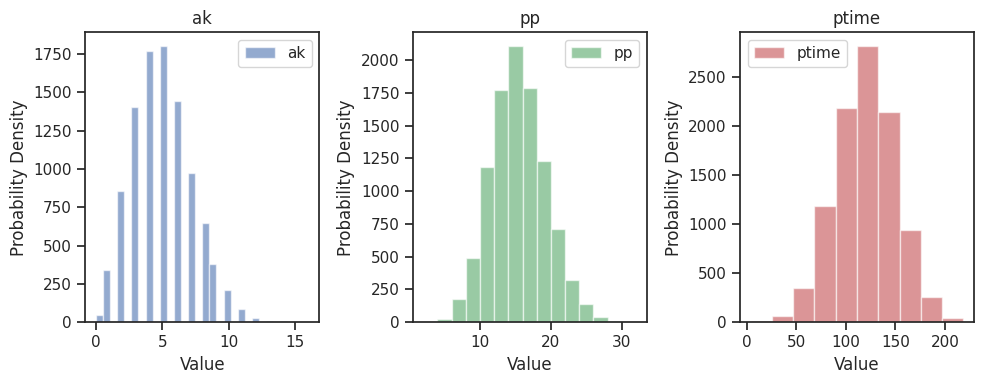

In [30]:
#question 1d

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm

# Set the seed for reproducibility
np.random.seed(1234)

# Assuming U contains the transformed variables

# Define parameters for the desired distributions
mean_ak = 5
mean_pp = 15
mean_ptime = 120
std_dev_ptime = 30

# Apply the quantile functions to obtain the variables
ak = poisson.ppf(U[:, 0], mean_ak)
pp = poisson.ppf(U[:, 1], mean_pp)
ptime = norm.ppf(U[:, 2], loc=mean_ptime, scale=std_dev_ptime)

# Plot
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.hist(ak, bins=30, density=False, alpha=0.6, color='b', label='ak')
plt.title('ak')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(pp, bins=15, density=False, alpha=0.6, color='g', label='pp')
plt.title('pp')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(ptime, bins=10, density=False, alpha=0.6, color='r', label='ptime')
plt.title('ptime')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has be

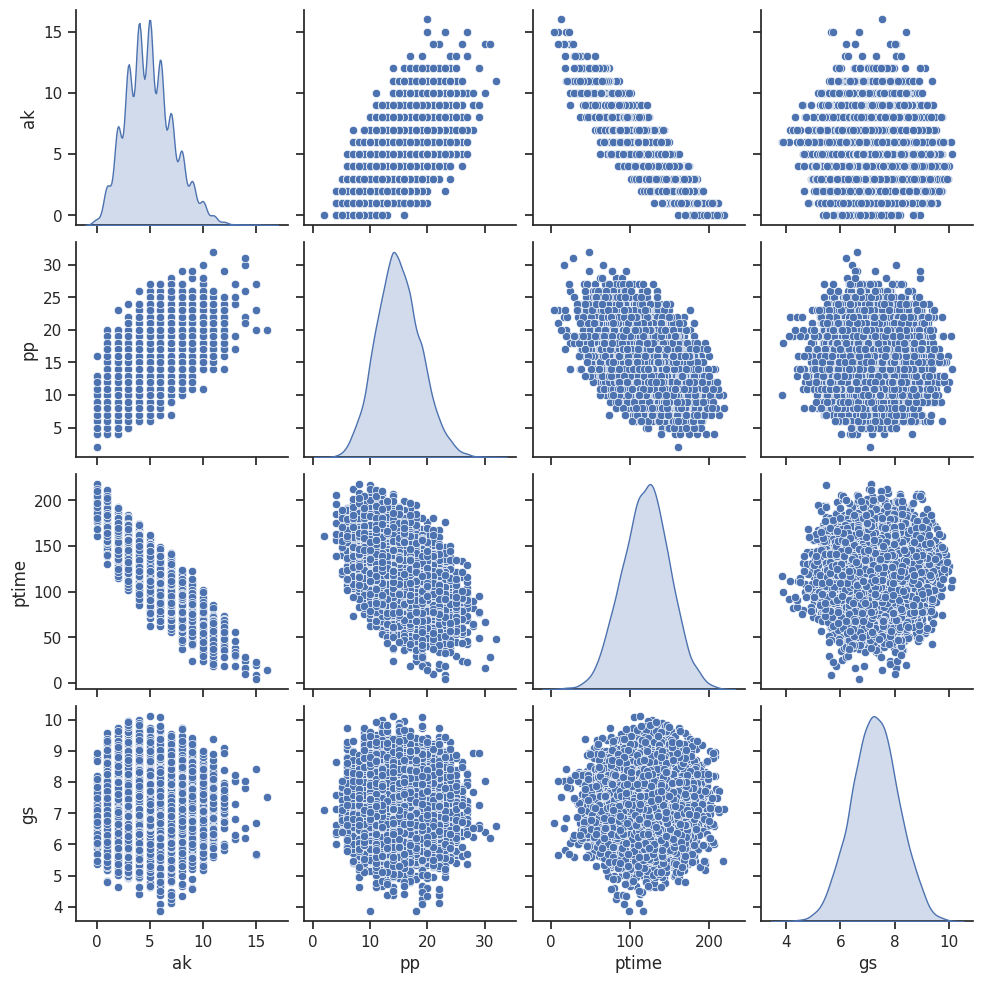

In [24]:
#question 1e
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ak, pp, ptime, and gs are already generated

# Create a DataFrame for the variables
data = pd.DataFrame({'ak': ak, 'pp': pp, 'ptime': ptime, 'gs': gs})

# Plot
sns.set(style="ticks")
sns.pairplot(data, diag_kind="kde", markers="o", kind="scatter", palette="husl")

plt.show()


#question 2a
#1 formula
$R_i = R_{i-1} + \frac{{R_{i-1} \cdot x_i \cdot (R_{i-1} \cdot x_i)^T}}{{1 + x_i^T \cdot R_{i-1} \cdot x_i}}$

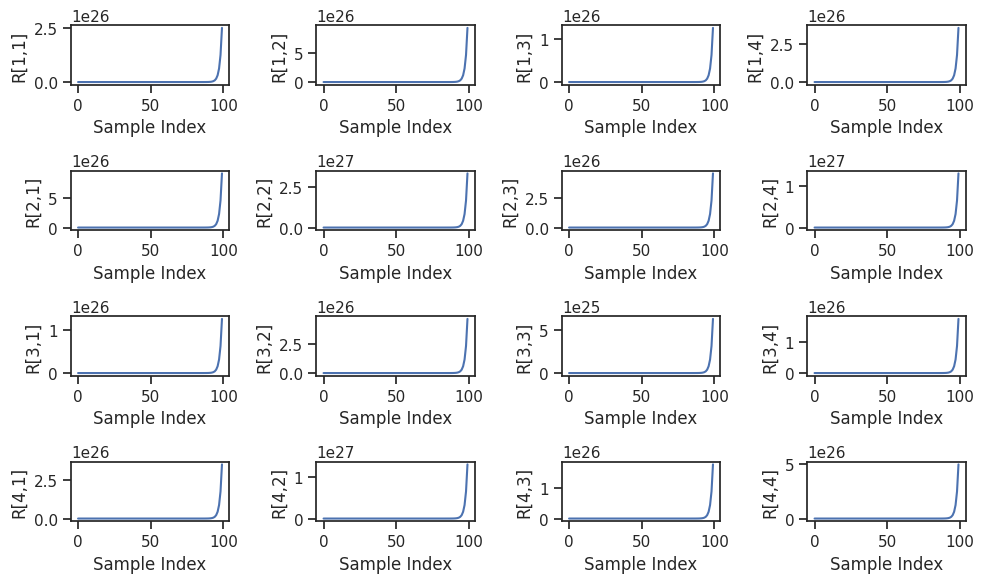

In [31]:
#2
import numpy as np
import matplotlib.pyplot as plt

# n is the dimensionality of the data
n = 4

# Initialize the sample identity matrix
R = np.eye(n)

# Generate some random data samples
num_samples = 100
data = np.random.randn(num_samples, n)

correlation_matrices = []

# Iterate through the data samples
for i in range(num_samples):
    # Reshape xi to be a column vector
    xi = data[i, :].reshape(-1, 1)
    denominator = 1 + np.dot(xi.T, np.dot(R, xi))
    R = R + np.dot(np.dot(R, xi), np.dot(xi.T, R)) / denominator
    correlation_matrices.append(R.copy())

# Plot
plt.figure(figsize=(10, 6))
for i in range(n):
    for j in range(n):
        plt.subplot(n, n, i * n + j + 1)
        plt.plot([np.abs(mat[i, j]) for mat in correlation_matrices])
        plt.xlabel('Sample Index')
        plt.ylabel(f'R[{i+1},{j+1}]')

plt.tight_layout()

plt.show()
